# Diamond price prediction
## Data science final project
<img width="1100" height="300" src="https://mp20-assets.ritani.com/cms/diamonds_banner_strapi_size_1464a7a8d7/diamonds_banner_strapi_size_1464a7a8d7.png">

### Background
Diamond is a solid mineral made of clean carbon. It is the most solid and bright mineral exist.  
Diamonds are mostly used for jewerly.  
Like many other things in life (cars for example), diamonds has a known and common price list, which determines the price for each diamond, based on the following parameters:
1. Carat
2. Color
3. Clarity
4. Cut

The thing is, that there are much more details about the diamond, which can also affect it's price:
1. Fluorescence
2. Symmetry
3. Polish
4. Depth percentage
5. Table percentage

That led me to try and figure out, if we can predict the price of a diamond based of all of these parameters.

### Steps
1. Data collection
2. Data manipulation and cleaning
3. EDA and visualizations
4. Model train and prediction
5. Summary

### 1. Data collection
I found the website https://brilliantearth.com that sells diamonds online.  
I wrote a script `scripts/fetch_diamonds_data.py` to scrape this website.  
The script gets carat range (min, max) and scrapes about 1000 diamonds from the website.  
I ran the script 5 times with different carat ranges to get 5,000 dimaonds.  
The diamonds that I fetched are round diamonds, in the carat range of 0.90-1.20.  

### 2. Data manipulation and cleaning
Required imports:

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score

Let's explore the dataset real quick:

In [2]:
df = pd.read_csv("data/diamonds.csv", thousands=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_number  4938 non-null   object 
 1   gemstone      4938 non-null   object 
 2   origin        4938 non-null   object 
 3   price         4938 non-null   object 
 4   carat         4938 non-null   float64
 5   shape         4938 non-null   object 
 6   cut           4938 non-null   object 
 7   color         4938 non-null   object 
 8   clarity       4938 non-null   object 
 9   measurements  4938 non-null   object 
 10  table         4938 non-null   object 
 11  depth         4938 non-null   object 
 12  symmetry      4938 non-null   object 
 13  polish        4938 non-null   object 
 14  girdle        4938 non-null   object 
 15  culet         4933 non-null   object 
 16  fluorescence  4889 non-null   object 
 17  diamond_id    4874 non-null   float64
dtypes: float64(2), object(16)
me

,stock_number,gemstone,origin,price,carat,shape,cut,color,clarity,measurements,table,depth,symmetry,polish,girdle,culet,fluorescence,diamond_id
0,5763178A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Good,F,SI2,5.96mm x 5.91mm x 3.89mm,63.0%,65.5%,Good,Very Good,6.5,Pointed,None,15407676.0
1,6450036Y,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,J,VS2,6.04mm x 5.99mm x 3.88mm,59.0%,64.5%,Excellent,Very Good,Slightly Thick - Thick,None,Faint,17667602.0
2,6057071A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,I,SI2,6.00mm x 5.93mm x 3.85mm,57.0%,64.6%,Very Good,Very Good,Thick,None,None,17504118.0
3,5073535A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,H,SI2,6.14mm x 6.09mm x 3.85mm,57.0%,63.0%,Excellent,Excellent,4.5,Pointed,None,15405592.0
4,5985294A,"Natural, untreated diamond",Botswana Sort,"$2,480",0.9,Round,Good,H,SI1,5.84mm x 5.79mm x 3.91mm,59.0%,67.3%,Very Good,Excellent,Very Thick,None,None,17750242.0


Seems that `diamond_id`, `fluorescence` and `culet` has some missing values, so I will drop these columns.  
Also let's remove duplicates and see if the amount of rows has changed.

In [3]:
df.drop(columns=['diamond_id', 'fluorescence', 'culet'], inplace=True)
df.drop_duplicates(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4899 entries, 0 to 4910
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_number  4899 non-null   object 
 1   gemstone      4899 non-null   object 
 2   origin        4899 non-null   object 
 3   price         4899 non-null   object 
 4   carat         4899 non-null   float64
 5   shape         4899 non-null   object 
 6   cut           4899 non-null   object 
 7   color         4899 non-null   object 
 8   clarity       4899 non-null   object 
 9   measurements  4899 non-null   object 
 10  table         4899 non-null   object 
 11  depth         4899 non-null   object 
 12  symmetry      4899 non-null   object 
 13  polish        4899 non-null   object 
 14  girdle        4899 non-null   object 
dtypes: float64(1), object(14)
memory usage: 612.4+ KB


,stock_number,gemstone,origin,price,carat,shape,cut,color,clarity,measurements,table,depth,symmetry,polish,girdle
0,5763178A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Good,F,SI2,5.96mm x 5.91mm x 3.89mm,63.0%,65.5%,Good,Very Good,6.5
1,6450036Y,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,J,VS2,6.04mm x 5.99mm x 3.88mm,59.0%,64.5%,Excellent,Very Good,Slightly Thick - Thick
2,6057071A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,I,SI2,6.00mm x 5.93mm x 3.85mm,57.0%,64.6%,Very Good,Very Good,Thick
3,5073535A,"Natural, untreated diamond",Botswana Sort,"$2,470",0.9,Round,Very Good,H,SI2,6.14mm x 6.09mm x 3.85mm,57.0%,63.0%,Excellent,Excellent,4.5
4,5985294A,"Natural, untreated diamond",Botswana Sort,"$2,480",0.9,Round,Good,H,SI1,5.84mm x 5.79mm x 3.91mm,59.0%,67.3%,Very Good,Excellent,Very Thick


Data preparation actions:  
1. Drop columns `stock_number`, `gemstone`, `origin` as they are not relevant.
2. Column `shape` can be dropped since the entire scraped data is for rounded diamonds.
3. Rename `table` &rarr; `table_pct`.
4. Rename `depth` &rarr; `depth_pct`.
5. Remove percentage sign from the data.
6. Remove dollar sign from `price` column.
7. Split `measurements` to three columnds: `x`, `y`, `z`.

In [4]:
df.drop(columns=['stock_number', 'gemstone', 'origin', 'shape'], inplace=True)
df.rename(columns={'table': 'table_pct', 'depth': 'depth_pct'}, inplace=True)

df['table_pct'] = df['table_pct'].str.rstrip('%').astype('float')
df['depth_pct'] = df['depth_pct'].str.rstrip('%').astype('float')

df['price'] = df['price'].str.replace(r',', '', regex=True)
df['price'] = df['price'].str.replace(r'$', '', regex=True).astype('float')

df['measurements'] = df['measurements'].str.replace('mm', '')
df['measurements'] = df['measurements'].str.replace(' ', '')
df[['x', 'y', 'z']] = df['measurements'].str.split('x', n=2, expand=True).astype('float')
df.drop(columns=['measurements'], inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4899 entries, 0 to 4910
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      4899 non-null   float64
 1   carat      4899 non-null   float64
 2   cut        4899 non-null   object 
 3   color      4899 non-null   object 
 4   clarity    4899 non-null   object 
 5   table_pct  4899 non-null   float64
 6   depth_pct  4899 non-null   float64
 7   symmetry   4899 non-null   object 
 8   polish     4899 non-null   object 
 9   girdle     4899 non-null   object 
 10  x          4899 non-null   float64
 11  y          4899 non-null   float64
 12  z          4899 non-null   float64
dtypes: float64(7), object(6)
memory usage: 535.8+ KB


,price,carat,cut,color,clarity,table_pct,depth_pct,symmetry,polish,girdle,x,y,z
0,2470.0,0.9,Good,F,SI2,63.0,65.5,Good,Very Good,6.5,5.96,5.91,3.89
1,2470.0,0.9,Very Good,J,VS2,59.0,64.5,Excellent,Very Good,Slightly Thick - Thick,6.04,5.99,3.88
2,2470.0,0.9,Very Good,I,SI2,57.0,64.6,Very Good,Very Good,Thick,6.00,5.93,3.85
3,2470.0,0.9,Very Good,H,SI2,57.0,63.0,Excellent,Excellent,4.5,6.14,6.09,3.85
4,2480.0,0.9,Good,H,SI1,59.0,67.3,Very Good,Excellent,Very Thick,5.84,5.79,3.91


Now, the most important columns `color`, `clarity`, `cut` will be converted from categorical to numeric.  

In [5]:
cols = ['color', 'clarity', 'cut']

for col in cols:
    print(f"Unique values for column {col} - {pd.unique(df[col])}")

Unique values for column color - ['F' 'J' 'I' 'H' 'E' 'G' 'D']
Unique values for column clarity - ['SI2' 'VS2' 'SI1' 'VS1' 'VVS2' 'VVS1' 'IF' 'FL']
Unique values for column cut - ['Good' 'Very Good' 'Ideal' 'Super Ideal' 'Fair']


In [6]:
df['color'].replace(to_replace=['D', 'E', 'F', 'G', 'H', 'I', 'J'],
    value=[7, 6, 5, 4, 3, 2, 1], inplace=True)

df['clarity'].replace(to_replace=['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2'],
    value=[8, 7, 6, 5, 4, 3, 2, 1], inplace=True)

df['cut'].replace(to_replace=['Super Ideal', 'Ideal', 'Very Good', 'Good', 'Fair'],
    value=[5, 4, 3, 2, 1], inplace=True)

df.head()

,price,carat,cut,color,clarity,table_pct,depth_pct,symmetry,polish,girdle,x,y,z
0,2470.0,0.9,2,5,1,63.0,65.5,Good,Very Good,6.5,5.96,5.91,3.89
1,2470.0,0.9,3,1,3,59.0,64.5,Excellent,Very Good,Slightly Thick - Thick,6.04,5.99,3.88
2,2470.0,0.9,3,2,1,57.0,64.6,Very Good,Very Good,Thick,6.00,5.93,3.85
3,2470.0,0.9,3,3,1,57.0,63.0,Excellent,Excellent,4.5,6.14,6.09,3.85
4,2480.0,0.9,2,3,2,59.0,67.3,Very Good,Excellent,Very Thick,5.84,5.79,3.91


Let's also check unique values for `symmetry`, `polish` and `girdle`

In [7]:
cols = ['symmetry', 'polish', 'girdle']

for col in cols:
    print(f"Unique values for column {col} - {pd.unique(df[col])}")

Unique values for column symmetry - ['Good' 'Excellent' 'Very Good' 'Fair']
Unique values for column polish - ['Very Good' 'Excellent' 'Good']
Unique values for column girdle - ['6.5' 'Slightly Thick - Thick' 'Thick' '4.5' 'Very Thick' 'Medium'
 'Medium - Thick' 'Thin - Slightly Thick'
 'Slightly Thick - Thick, Faceted' 'Thick - Very Thick(Faceted)'
 'Medium - Slightly Thick' 'Thin - Thick' 'Medium - Very Thick'
 'Very Thin - Thick, Faceted' 'Slightly Thick'
 'Thin - Very Thick(Faceted)' 'Thick - Very Thick' 'Thin' '5'
 'Medium - Slightly Thick - (Facete' '6' 'Thick - Very Thick, Faceted'
 'Very Thin' 'Slightly Thick - Very Thick(Faceted)'
 'Medium - Slightly Thick, Faceted' '5.5' '7' 'Very Thin - Thick'
 'Sl.Tk - Thick' 'Thick - V.Tk' 'Slightly Thick - Very Thick' '4'
 'Medium - Thick, Faceted' 'Thin - Slightly Thick, Faceted'
 'Thick, Faceted' 'Thin - Very Thick' 'V.Tn - Thick'
 'Medium - Very Thick(Faceted)' 'Very Thin - Very Thick(Faceted)'
 'Thick - Thick(Faceted)' 'Thin - Very Th

We can see that only `symmetry` and `polish` can be helpful, but `girdle` is not relevant since it has too many unique values.

In [8]:
df.drop(columns=['girdle'], inplace=True)

df['symmetry'].replace(to_replace=['Excellent', 'Very Good', 'Good', 'Fair'],
    value=[4, 3, 2, 1], inplace=True)

df['polish'].replace(to_replace=['Excellent', 'Very Good', 'Good'],
    value=[3, 2, 1], inplace=True)

In [9]:
df.reset_index(inplace=True, drop=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      4899 non-null   float64
 1   carat      4899 non-null   float64
 2   cut        4899 non-null   int64  
 3   color      4899 non-null   int64  
 4   clarity    4899 non-null   int64  
 5   table_pct  4899 non-null   float64
 6   depth_pct  4899 non-null   float64
 7   symmetry   4899 non-null   int64  
 8   polish     4899 non-null   int64  
 9   x          4899 non-null   float64
 10  y          4899 non-null   float64
 11  z          4899 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 459.4 KB


,price,carat,cut,color,clarity,table_pct,depth_pct,symmetry,polish,x,y,z
0,2470.0,0.9,2,5,1,63.0,65.5,2,2,5.96,5.91,3.89
1,2470.0,0.9,3,1,3,59.0,64.5,4,2,6.04,5.99,3.88
2,2470.0,0.9,3,2,1,57.0,64.6,3,2,6.00,5.93,3.85
3,2470.0,0.9,3,3,1,57.0,63.0,4,3,6.14,6.09,3.85
4,2480.0,0.9,2,3,2,59.0,67.3,3,3,5.84,5.79,3.91


### 3. EDA and visualizations
As our dataset is now clean and ready for use, let's look for some interesting facts about our data.  
First of all, let's explore the most common values for `clarity`, `color` and `cut`:  


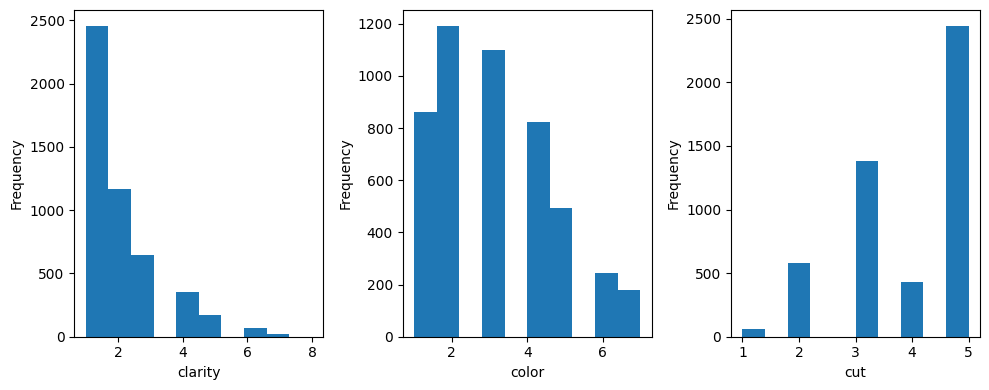

In [10]:
cols = ['clarity', 'color', 'cut']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
i = 0
for col in cols:
    axes[i].hist(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    i+=1
plt.tight_layout()

We can **clearly** see that the worst `clarity` (SI2) is most common, and as `clarity` gets better, there are less diamonds.  
Meaning the highest clarities FL(8), IF(7) can barely be found, while the lowest clarities SI2(1), SI1(2) are most common.  
For `color` also the best colors are less common, but also the worst color are not so common as well.  
The most common colors are the mid range colors I(2) and H(3).  
For `cut`, there is no pattern that can be identified.  

Let's check the same for `symmetry` and `polish`:

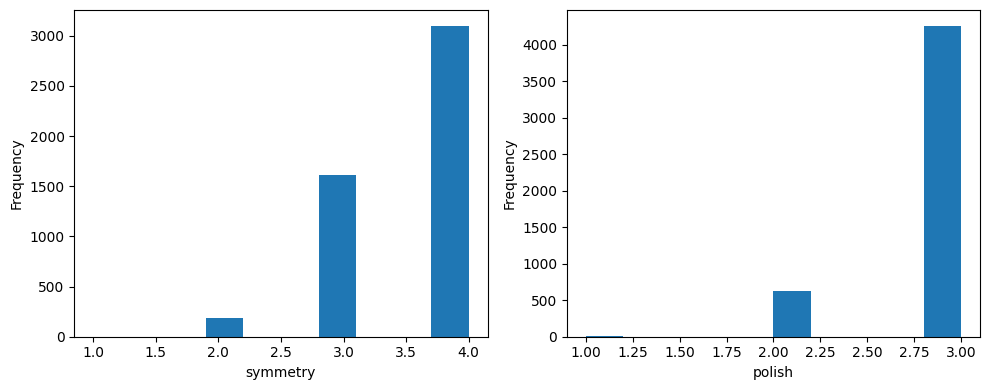

In [11]:
cols = ['symmetry', 'polish']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
i = 0
for col in cols:
    axes[i].hist(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    i+=1
plt.tight_layout()

Seems that most of the diamonds I fetched has the best `polish` and `symmetry`.  
This probably means that https://brilliantearth.com website only treats high quality products 😀.

From the diamond range I fetched (0.90-1.20), let's see which carat size is most common:

Text(0, 0.5, 'Frequency')

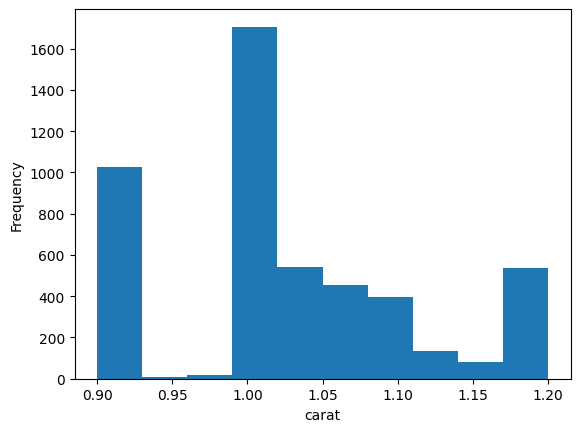

In [12]:
ax = df['carat'].plot.hist()
ax.set_xlabel('carat')
ax.set_ylabel('Frequency')

We can see that in the dataset, most of the diamonds are 0.90 carat or 1.00 carat.

Let's check correlation between the diamond price and the 4Cs:
1. Carat
2. Color
3. Clarity
4. Cut

<AxesSubplot: >

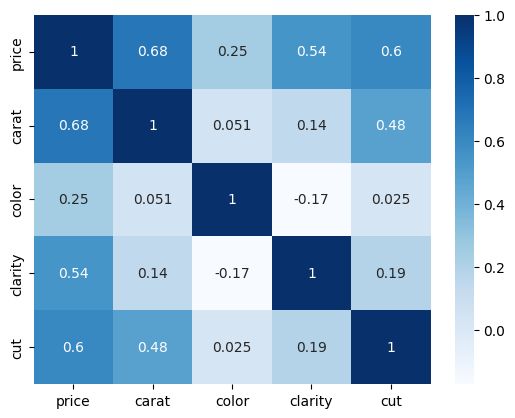

In [13]:
sub_df = df[['price', 'carat', 'color', 'clarity', 'cut']]
sub_df_corr = sub_df.corr()
sns.heatmap(sub_df_corr, cmap="Blues", annot=True)

We can see that `carat`, `clarity` and `cut` has some correlation with `price` column.  
Meaning that if `carat`, `clarity`, `cut` increases, `price` is also increasing in chance of ~60%.  
On the other hand, `color` does not correlate with the diamond price.

Let's also check the additional columns we have in the dataset:
1. `symmetry`
2. `polish`
3. `table_pct`
4. `depth_pct`

<AxesSubplot: >

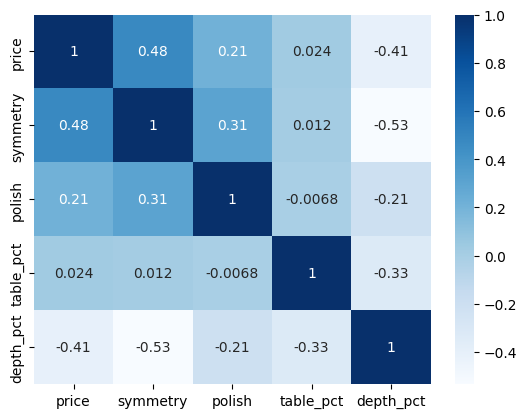

In [28]:
sub_df = df[['price', 'symmetry', 'polish', 'table_pct', 'depth_pct']]
sub_df_corr = sub_df.corr()
sns.heatmap(sub_df_corr, cmap="Blues", annot=True)

While `symmetry` has about 50%~ correlation with `price`, the other columns are less relevant.

### 4. Model train and prediction
We will try to predict the `price` column based on the information we have on the diamond.  
Here are 2 functions for reuse.

In [22]:
def preprate_dataset_for_model(df, y_column):
    y = df[y_column]
    X = df.copy()
    del X[y_column]
    return X, y

In [23]:
def model_train_and_predict(df, y_column, test_size, rand_state):
    X, y = preprate_dataset_for_model(df, y_column)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    evaluate_r2 = r2_score(y_test, y_predicted)
    df_res = pd.DataFrame(columns=['y_test', 'y_predicted'])
    df_res['y_test'] = y_test
    df_res['y_predicted'] = y_predicted
    df_res.reset_index(inplace=True, drop=True)
    print(df_res)
    print(f"Model r2 score is {evaluate_r2}")

First of all, let's try to predict the price column, based only on the 4Cs (like the price list does).

In [31]:
model_train_and_predict(df[['price', 'carat', 'color', 'clarity', 'cut']], 'price', 0.25, 7)

      y_test  y_predicted
0     4950.0  4531.802993
1     3720.0  3491.837357
2     7330.0  5691.437178
3     2960.0  3887.014687
4     6180.0  6903.198049
...      ...          ...
1220  9960.0  7681.905394
1221  7960.0  7040.933506
1222  4830.0  4635.847615
1223  4160.0  4449.200612
1224  3560.0  3979.251799

[1225 rows x 2 columns]
Model r2 score is 0.8083154889312754


We reached R2 score of ~0.808 which is overall pretty good.
The dataset includes much more features about the diamonds:
1. `symmetry`
2. `polish`
3. `x`
4. `y`
5. `z`
6. `table_pct`
7. `depth_pct`

Let's see if using all the features in the dataset brings better prediction results.

In [27]:
model_train_and_predict(df, 'price', 0.25, 7)

      y_test  y_predicted
0     4950.0  4525.611696
1     3720.0  3376.848786
2     7330.0  5686.642339
3     2960.0  3795.031689
4     6180.0  6869.920258
...      ...          ...
1220  9960.0  7671.247093
1221  7960.0  7040.771144
1222  4830.0  4662.611090
1223  4160.0  4520.784106
1224  3560.0  3939.163535

[1225 rows x 2 columns]
Model r2 score is 0.809260893022758


We reached R2 score of ~0.809, so involving all new features is not beneficial.  
Let's try to remove `color` as this is the least correlated feature from the 4Cs, and use only `symmetry` instead.

In [29]:
model_train_and_predict(df[['price', 'carat', 'clarity', 'cut', 'symmetry']], 'price', 0.25, 7)

      y_test  y_predicted
0     4950.0  4326.882359
1     3720.0  3248.910968
2     7330.0  5664.021295
3     2960.0  3662.030751
4     6180.0  5664.021295
...      ...          ...
1220  9960.0  6789.091187
1221  7960.0  6568.441043
1222  4830.0  4440.925291
1223  4160.0  4779.092232
1224  3560.0  4067.250845

[1225 rows x 2 columns]
Model r2 score is 0.7294075844808778


We got a worst result.  
One last try - not involving `symmetry` but also drop `color`.

In [30]:
model_train_and_predict(df[['price', 'carat', 'clarity', 'cut']], 'price', 0.25, 7)

      y_test  y_predicted
0     4950.0  4326.543060
1     3720.0  3250.895122
2     7330.0  5663.851164
3     2960.0  3658.868017
4     6180.0  5663.851164
...      ...          ...
1220  9960.0  6789.227140
1221  7960.0  6568.322353
1222  4830.0  4437.974462
1223  4160.0  4778.778655
1224  3560.0  4066.840912

[1225 rows x 2 columns]
Model r2 score is 0.7294099699535548


Same outcome as before.

### 5. Conclusion
Seems that the orgnization who sets the diamonds prices (which is GIA - https://www.gia.edu/) did some pretty good work.  
Looking at the above results, we can understand that treating the 4Cs as the only features for the diamond price prediction, brings the best results.  
On the other hand, we can also learn that even for two identical diamonds in terms of the 4Cs, the price is not fixed, and is affected but other details as well.
